In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Milk Quality Prediction

**Predict Milk Quality**
Features Used for Building Models:

- pH: The pH level of the milk.
- Temperature: The temperature of the milk.
- Taste: A binary feature indicating whether the taste of the milk is satisfactory (1) or not (0).
- Odor: A binary feature indicating whether the odor of the milk is satisfactory (1) or not (0).
- Fat: The fat content of the milk.
- Turbidity: A measure of the milk's cloudiness or haziness.
- Colour: The color of the milk.

The models built in the code aim to predict the Grade of the milk, which is a categorical variable representing the quality of the milk. The possible values for Grade are:

- 0: Low (Bad)
- 1: Medium (Moderate)
- 2: High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.

## Imports

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading the data

Dataset from keggle: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Quality Prediction/milknew.csv')

## Data pre-processing and EDA

In [ ]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.shape

(1059, 8)

In [ ]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

Text(0.5, 1.0, 'Grade v/s colour')

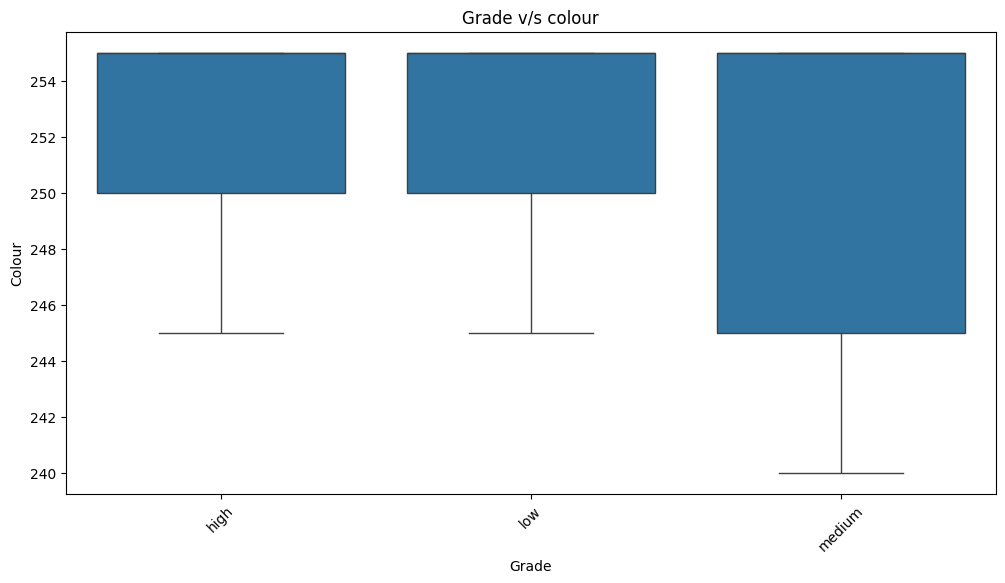

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Colour', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s colour')

Text(0.5, 1.0, 'Grade v/s Turbidity')

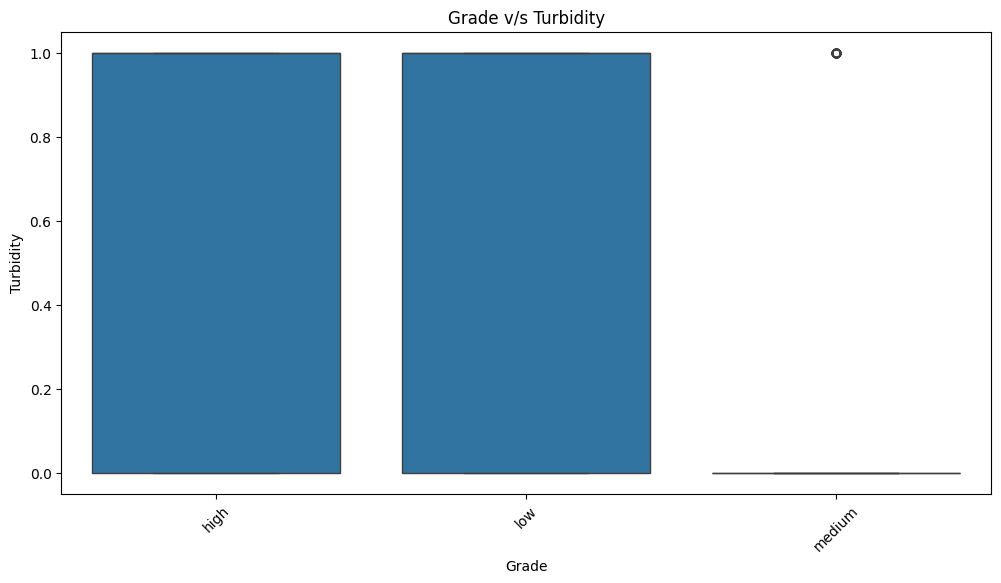

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Turbidity', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Turbidity')

Text(0.5, 1.0, 'Grade v/s Fat ')

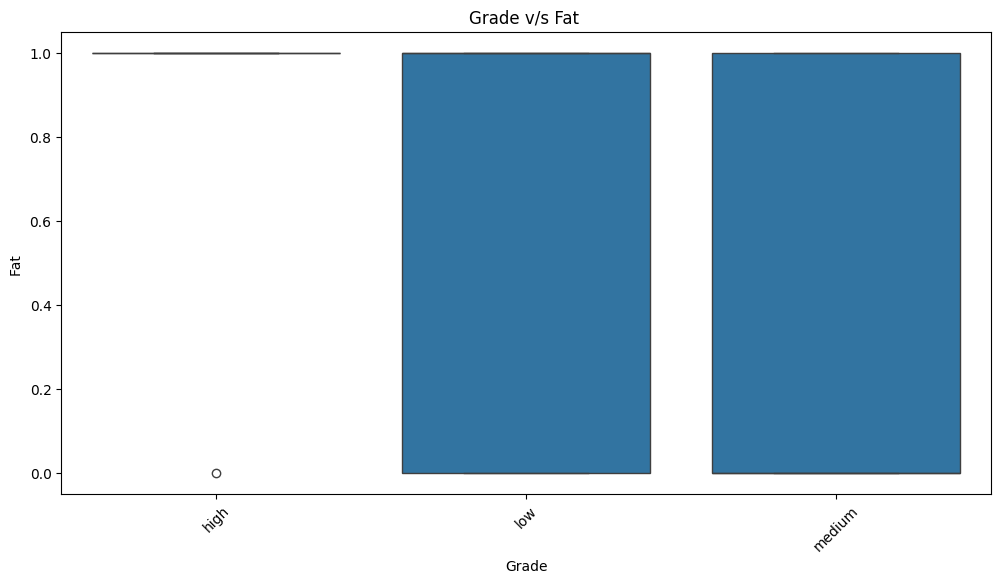

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Fat ', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Fat ')

Text(0.5, 1.0, 'Grade v/s Odor')

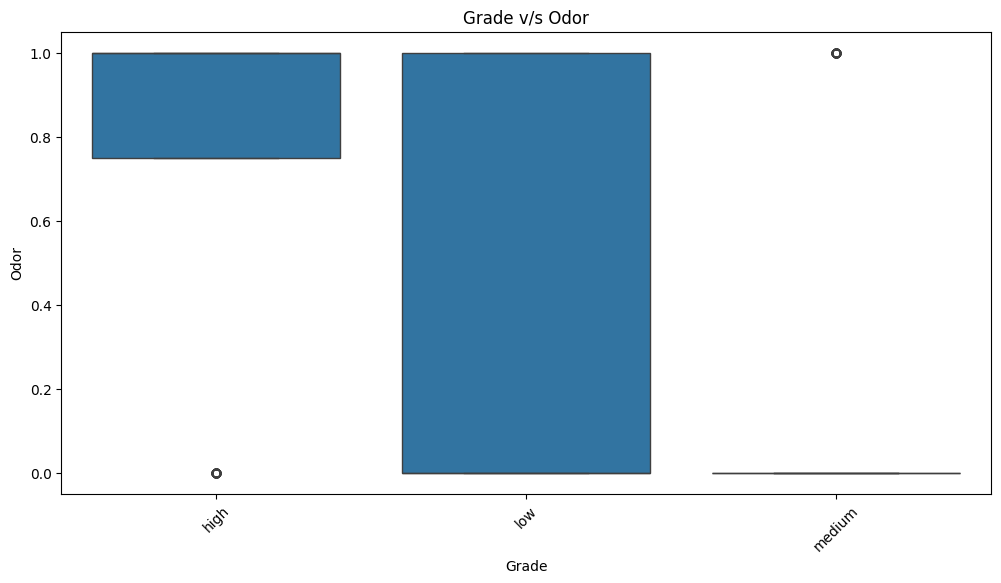

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='Odor', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s Odor')

Text(0.5, 1.0, 'Grade v/s pH')

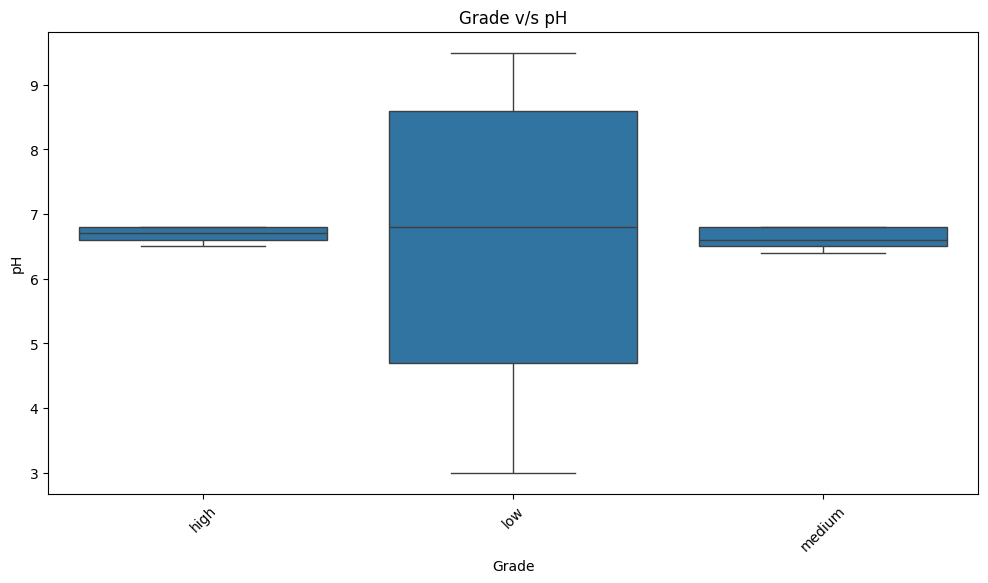

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Grade', y='pH', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade v/s pH')

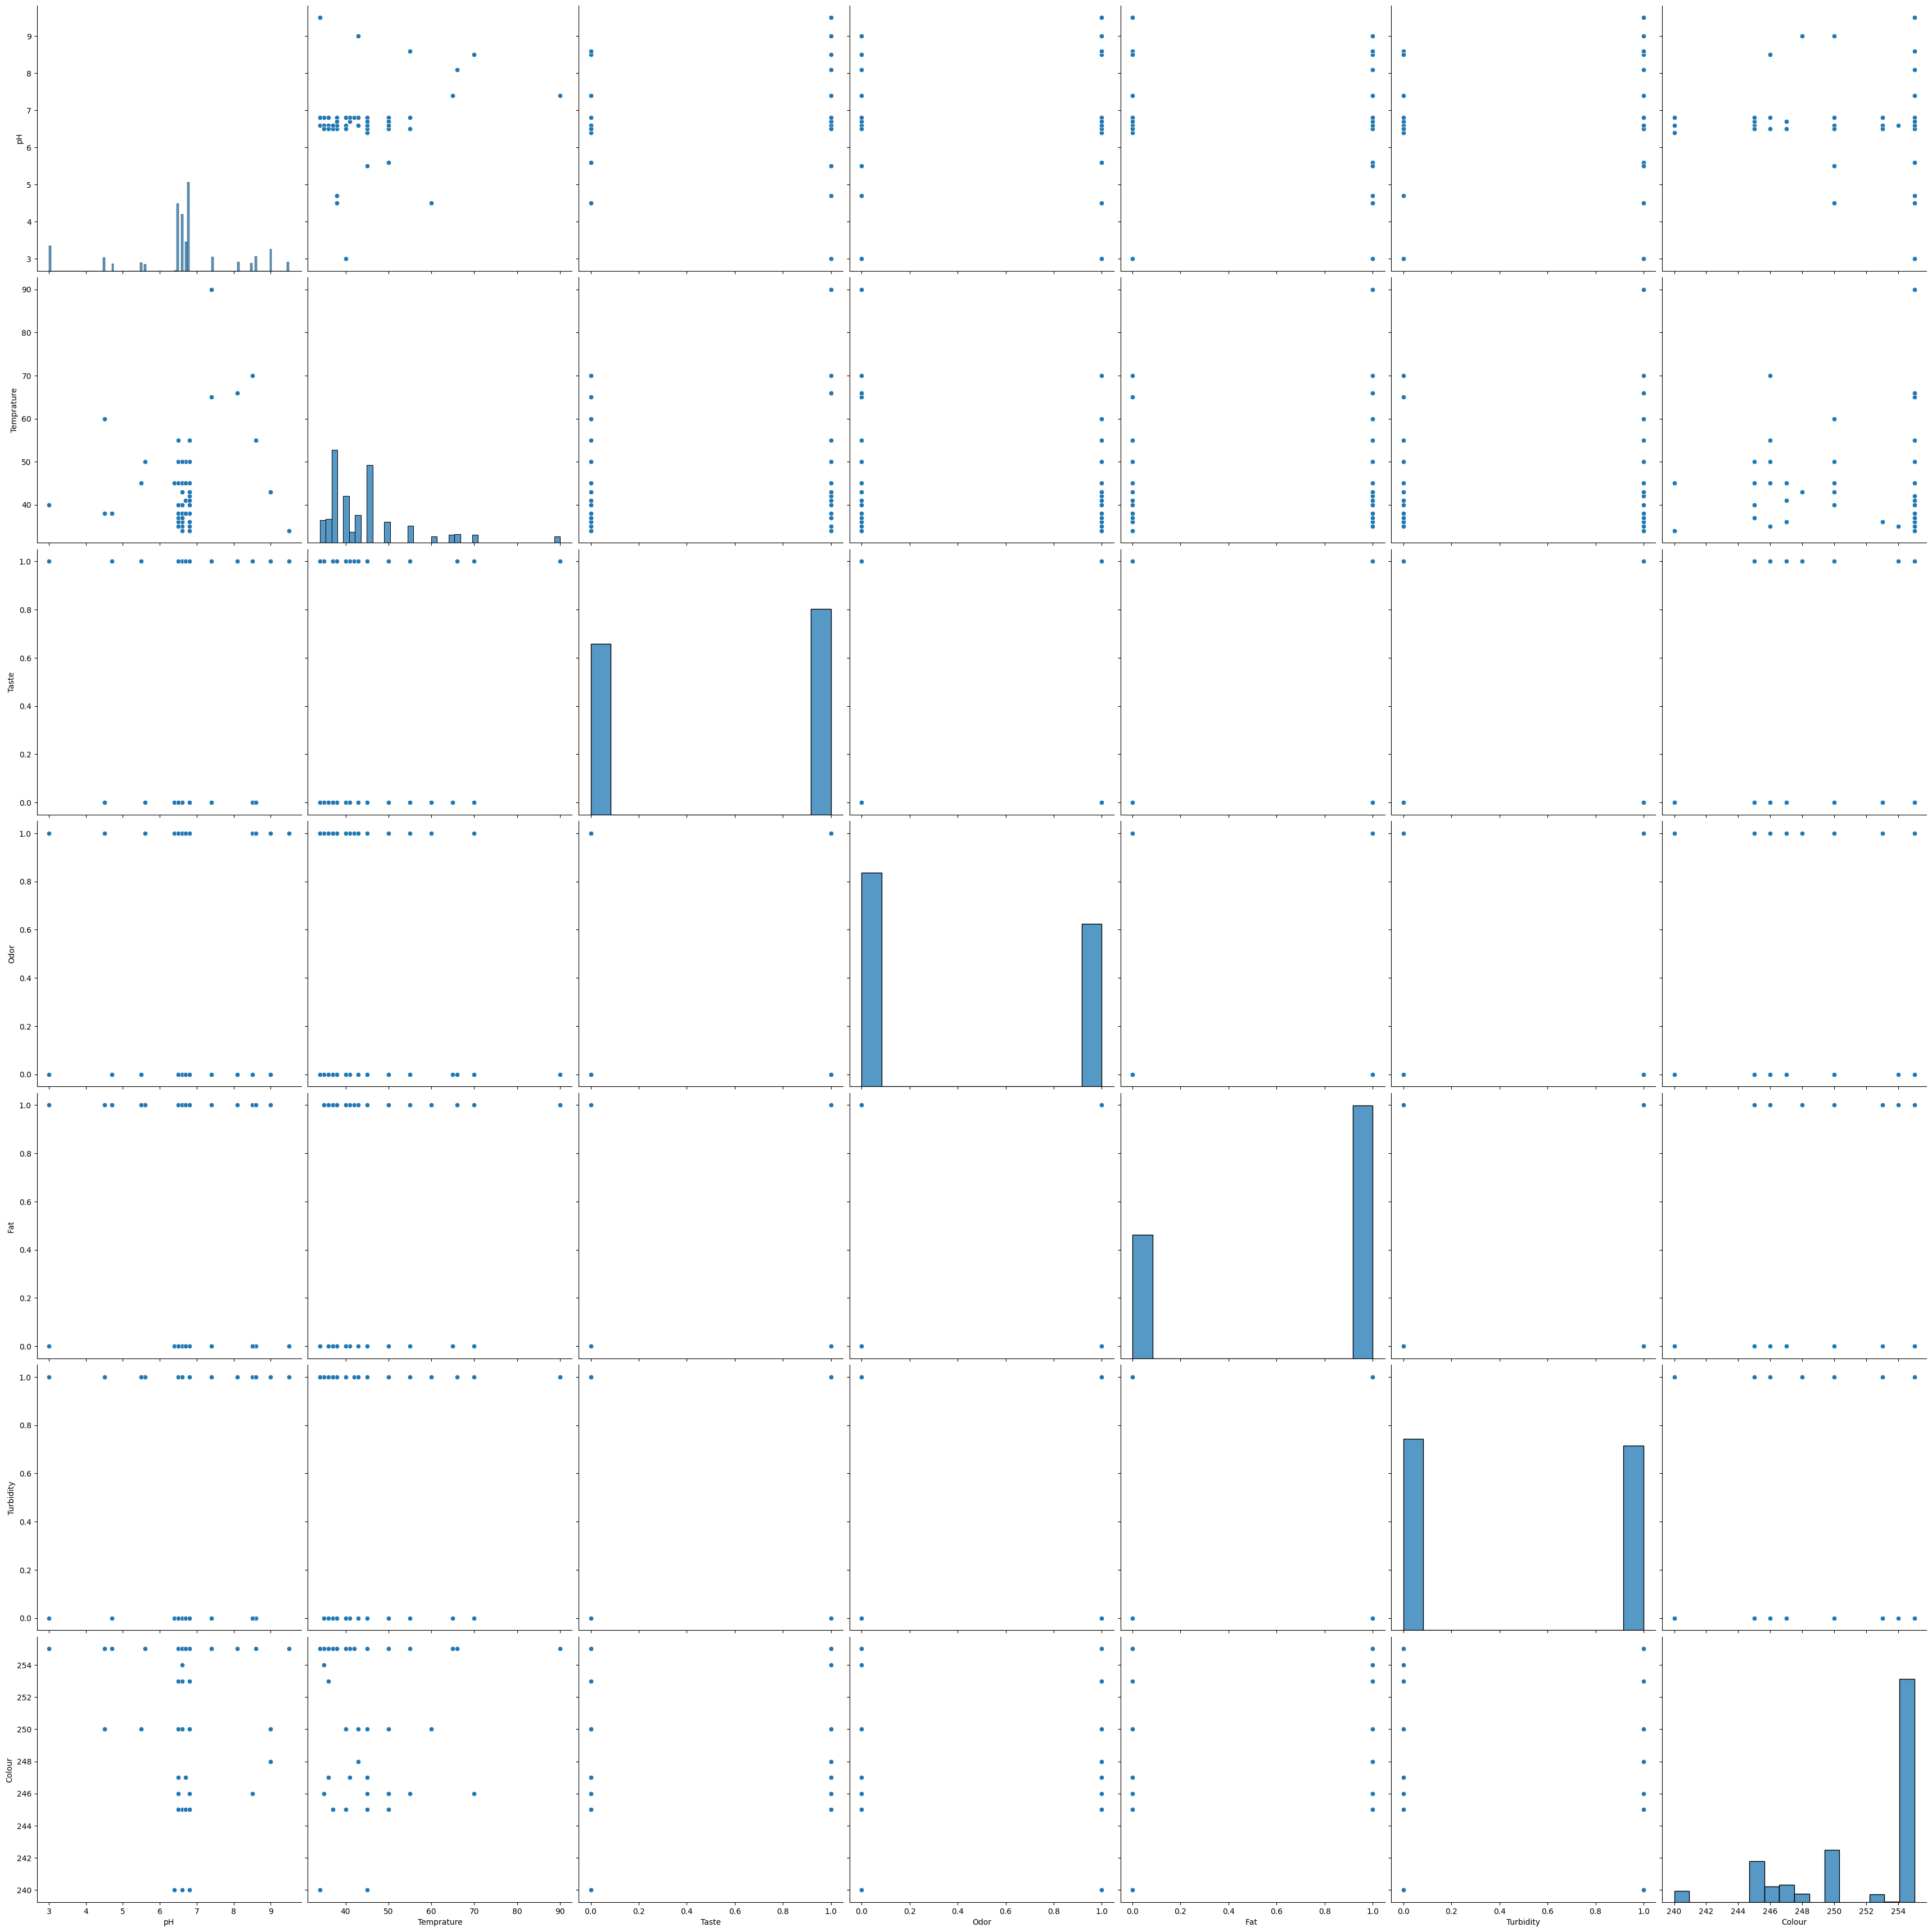

In [ ]:
sns.pairplot(df,height=5)

## Preparing the data

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])

df['Grade'].unique()

array([0, 1, 2])

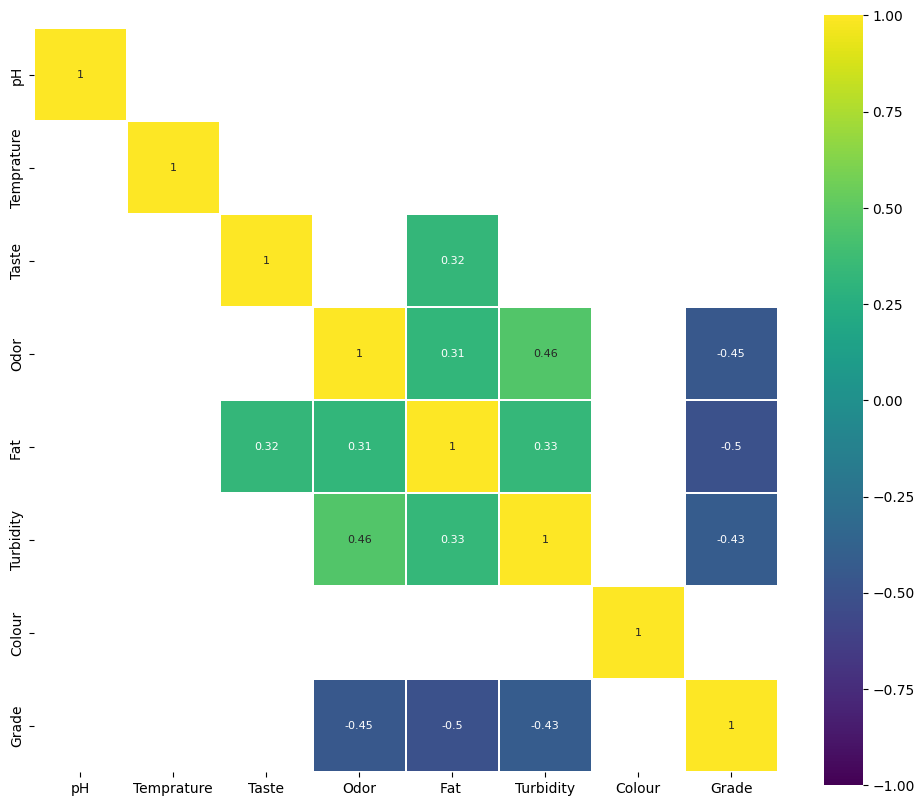

In [ ]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df[['Grade']]

In [ ]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


# MODEL BUILDING

# Decision tree classifier
–A decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split.

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [ ]:
print(cm)

[[  0   0  76]
 [  0  87  28]
 [  0   0 127]]


# SVM (Support vector machine) classifier
-SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear).

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print(cm)

[[ 70   3   3]
 [ 15  98   2]
 [ 14   8 105]]


# KNN (k-nearest neighbors) classifier
– KNN or k-nearest neighbors is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbors from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors.

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

0.9685534591194969
[[ 69   0   7]
 [  1 112   2]
 [  0   0 127]]


# Naive Bayes classifier
– Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of features in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

0.9025157232704403
[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]


In [ ]:
from sklearn.metrics import classification_report


# Evaluate and compare models using classification_report
print("Decision Tree Classifier:")
print(classification_report(y_test, dtree_predictions))

print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

print("KNN Classifier:")
print(classification_report(y_test, knn_predictions))

print("Naive Bayes Classifier:")
print(classification_report(y_test, gnb_predictions))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.76      0.86       115
           2       0.55      1.00      0.71       127

    accuracy                           0.67       318
   macro avg       0.52      0.59      0.52       318
weighted avg       0.58      0.67      0.59       318

SVM Classifier:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        76
           1       0.90      0.85      0.88       115
           2       0.95      0.83      0.89       127

    accuracy                           0.86       318
   macro avg       0.85      0.87      0.85       318
weighted avg       0.88      0.86      0.86       318

KNN Classifier:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        76
           1       1.00      0.97      0.99       115
           2     

Model saving

In [ ]:
import joblib

model_path = "/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Quality Prediction/milk_quality_svm_model.joblib"
joblib.dump(svm_model_linear, model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Quality Prediction/milk_quality_svm_model.joblib


In [ ]:
knn_model_path = "/content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Quality Prediction/milk_quality_knn_model.joblib"
joblib.dump(knn, knn_model_path)
print(f"KNN Model saved to {knn_model_path}")


KNN Model saved to /content/drive/MyDrive/Colab Notebooks/Bovi Track/ML/Milk Quality Prediction/milk_quality_knn_model.joblib
